In [1]:
import pype.client_api as dp
from pype.data_object import Data
import pandas as pd
import numpy as np
import alphalens
import matplotlib.pyplot as plt
%matplotlib inline

Data object initializing.
......
Data object initialized.


/devbooks/.venv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [3]:
start, end = '2016-12-10', '2017-12-10'
a_b_symbols = dp.symbolinfo(tag='bist_bulletin',symbol_class=['A','B'],start=start, end=end)['symbol'].tolist()

In [4]:
prices_data = Data.price.daily.adjusted_close.TR.get(symbols=a_b_symbols, start=start, end=end)
prices_data

,symbol,adjusted_close,date
0,GOODY,3.412970,2016-12-12
1,ALCTL,6.650000,2016-12-12
2,HALKB,9.096740,2016-12-12
3,NTHOL,3.219050,2016-12-12
4,KUYAS,3.189770,2016-12-12
5,ECZYT,7.776520,2016-12-12
6,ADEL,14.530100,2016-12-12
7,FINBN,4.155220,2016-12-12
8,ISYAT,0.831250,2016-12-12
9,YAZIC,12.492400,2016-12-12


In [5]:
prices_data['Returns'] = prices_data['adjusted_close'].pct_change()
assets_data = prices_data.pivot(columns = 'symbol', index = 'date', values = 'adjusted_close')

In [6]:
assets_data

symbol,ACSEL,ADANA,ADBGR,ADEL,ADESE,ADNAC,AEFES,AFYON,AGYO,AKBNK,...,VKGYO,YATAS,YAZIC,YGGYO,YGYO,YKBNK,YKGYO,YUNSA,YYAPI,ZOREN
date,,,,,,,,,,,,,,,,,,,,,
2016-12-12,2.53094,5.24049,3.69861,14.5301,1.90,0.728645,17.9893,7.70,1.81149,7.43447,...,2.22303,3.68,12.4924,13.3064,0.50,3.39,1.20,2.42,0.85,1.19826
2016-12-13,2.59988,5.22308,3.69861,14.5686,1.84,0.728645,18.2561,7.74,1.82575,7.60986,...,2.22303,3.82,12.3952,12.6612,0.49,3.43,1.19,2.43,0.85,1.20641
2016-12-14,2.55064,5.21437,3.69861,14.6743,1.82,0.737640,17.9102,7.68,1.86141,7.67807,...,2.22303,3.90,12.2979,12.6331,0.51,3.45,1.19,2.38,0.89,1.19826
2016-12-15,2.57033,5.30143,3.74212,14.7609,1.86,0.746636,17.9794,7.74,1.88280,7.75602,...,2.23283,4.01,12.3854,12.4648,0.52,3.53,1.20,2.40,0.89,1.24717
2016-12-16,2.58018,5.35366,3.75082,14.8570,1.85,0.737640,17.7323,8.07,1.86854,7.64884,...,2.23283,4.23,12.4729,12.6237,0.51,3.50,1.20,2.41,0.89,1.22271
2016-12-19,2.57033,5.36236,3.76823,15.0494,1.83,0.737640,17.8015,8.08,1.85428,7.59037,...,2.22303,4.32,12.5799,12.6144,0.50,3.42,1.19,2.44,0.88,1.19826
2016-12-20,2.58018,5.40589,3.78563,15.0974,1.83,0.737640,17.9497,8.21,1.81862,7.64884,...,2.24262,4.77,12.9104,12.5115,0.49,3.45,1.19,2.44,0.88,1.19011
2016-12-21,2.57033,5.40589,3.78563,15.1167,1.81,0.746636,17.9201,8.25,1.84714,7.60986,...,2.26221,4.86,12.8424,12.5302,0.50,3.43,1.19,2.46,0.88,1.18195
2016-12-22,2.51125,5.47553,3.82044,15.0109,1.83,0.755632,17.7026,8.07,1.83288,7.58063,...,2.25241,4.71,12.8035,12.5863,0.50,3.41,1.19,2.46,0.87,1.18195


In [7]:
assets_data.dropna(how="all", axis=1, inplace=True)

### Get the Market Data

In [8]:
market_data = dp.index(symbol = 'XU100', start = start, end= end)
market_data['Returns'] = market_data['adjusted_close'].pct_change()
market_data

,symbol,adjusted_close,date,Returns
0,XU100,76239.6,2016-12-12,NaN
1,XU100,76995.3,2016-12-13,0.009912
2,XU100,76880.9,2016-12-14,-0.001486
3,XU100,77678.6,2016-12-15,0.010376
4,XU100,77589.6,2016-12-16,-0.001146
5,XU100,77157.8,2016-12-19,-0.005565
6,XU100,77807.9,2016-12-20,0.008426
7,XU100,77619.5,2016-12-21,-0.002421
8,XU100,77404.7,2016-12-22,-0.002767
9,XU100,76972.1,2016-12-23,-0.005589


In [9]:
market_data.set_index("date", inplace = True)
market_data

,symbol,adjusted_close,Returns
date,,,
2016-12-12,XU100,76239.6,NaN
2016-12-13,XU100,76995.3,0.009912
2016-12-14,XU100,76880.9,-0.001486
2016-12-15,XU100,77678.6,0.010376
2016-12-16,XU100,77589.6,-0.001146
2016-12-19,XU100,77157.8,-0.005565
2016-12-20,XU100,77807.9,0.008426
2016-12-21,XU100,77619.5,-0.002421
2016-12-22,XU100,77404.7,-0.002767


### Get the Betas

In [10]:
start_date = start
end_date = end

In [11]:
Volatilities_dict = {}
Betas_dict = {}

Rolling_Volatilities_Frame =  pd.DataFrame(index = assets_data.loc[start_date:end_date].index)



In [12]:
for symbol in assets_data.columns:
    
    assets_data_processed = assets_data[symbol].loc[start_date:end_date].dropna().pct_change().iloc[1:]
    market_data_processed = market_data.copy().reindex( assets_data_processed.index.intersection(market_data.iloc[1:].index))
    
    if len(assets_data_processed) == (len(assets_data[symbol].loc[start_date:end_date])-1):
        
        Regression_Frame = pd.concat([assets_data_processed, market_data_processed['Returns']], axis = 1)
        
        
        corr_of_asset = Regression_Frame.corr()[symbol].iloc[1]
        
        #std_of_asset = Regression_Frame.rolling(window = int(window_size)).std()[symbol]
        
        std_of_asset = Regression_Frame[symbol].std()
        Volatilities_dict[symbol] = std_of_asset
        
        rolling_std_of_asset = Regression_Frame.rolling(window = len(Regression_Frame)).std()[symbol]
        Rolling_Volatilities_Frame[symbol] = rolling_std_of_asset
        
        
        std_of_market_rolling = Regression_Frame['Returns'].rolling(window = len(Regression_Frame)).std()
        std_of_asset_rolling = Regression_Frame[symbol].rolling(window = len(Regression_Frame)).std()
        #std_of_market = market_data_processed['Returns'].rolling(window = 252).std() 
        #std_of_market = Vol_Frame.rolling(window = int(window_size)).std()['Returns'] # above expressions are equivalent
        Betas = (corr_of_asset*std_of_asset_rolling)/std_of_market_rolling
        last_value_of_Betas = Betas.iloc[-1]
        Betas_dict[symbol] = last_value_of_Betas
        #Betas_Frame[symbol] = Betas

In [13]:
Betas_dict

{'ACSEL': 0.5487861719179504,
 'ADANA': 0.33707880227014414,
 'ADBGR': 0.32005967734183033,
 'ADEL': 0.5574866733774192,
 'ADESE': 0.9237637223581892,
 'ADNAC': 0.9478695659602319,
 'AEFES': 0.47989443822864,
 'AFYON': 0.8347871292127012,
 'AGYO': 0.6179447183078002,
 'AKBNK': 1.3955850417921616,
 'AKCNS': 0.4783256385273346,
 'AKENR': 0.9141793286554557,
 'AKFGY': 0.34450078657736505,
 'AKGRT': 0.47611218082934326,
 'AKGUV': 0.3551162194640302,
 'AKMGY': 0.2890243479172599,
 'AKSA': 0.6827388267068499,
 'AKSEN': 0.5604914404840713,
 'AKSGY': 0.3344665245779149,
 'AKSUE': 0.3884703717244634,
 'ALARK': 0.8695461395539186,
 'ALBRK': 0.697617777002428,
 'ALCAR': 1.0614413789263901,
 'ALCTL': 0.8790285599744888,
 'ALGYO': 0.8167781179758185,
 'ALKA': 0.7528986140498244,
 'ALKIM': 0.7283403200708424,
 'ALYAG': -0.10477701666980561,
 'ANACM': 0.8283636313781867,
 'ANELE': 0.43242122828771945,
 'ANHYT': 0.2180178963623096,
 'ANSGR': 0.20885299939802962,
 'ARCLK': 0.847489815753404,
 'ARENA': 

In [14]:
Betas_series = pd.Series(Betas_dict)
Betas_series 

ACSEL    0.548786
ADANA    0.337079
ADBGR    0.320060
ADEL     0.557487
ADESE    0.923764
ADNAC    0.947870
AEFES    0.479894
AFYON    0.834787
AGYO     0.617945
AKBNK    1.395585
AKCNS    0.478326
AKENR    0.914179
AKFGY    0.344501
AKGRT    0.476112
AKGUV    0.355116
AKMGY    0.289024
AKSA     0.682739
AKSEN    0.560491
AKSGY    0.334467
AKSUE    0.388470
ALARK    0.869546
ALBRK    0.697618
ALCAR    1.061441
ALCTL    0.879029
ALGYO    0.816778
ALKA     0.752899
ALKIM    0.728340
ALYAG   -0.104777
ANACM    0.828364
ANELE    0.432421
           ...   
TTRAK    0.587479
TUCLK    0.728711
TUKAS    0.732313
TUPRS    0.717724
TURGG    0.262499
ULKER    0.671906
ULUSE    0.383875
ULUUN    0.790080
UNYEC    0.209012
USAK     0.883484
UTPYA    0.319552
VAKBN    1.617265
VAKFN    1.078220
VAKKO    0.732254
VANGD    1.017987
VERTU    0.778340
VERUS    0.231257
VESBE    0.918362
VESTL    1.372591
VKFYO    0.751481
VKGYO    1.035333
YATAS    0.732298
YAZIC    0.951288
YGGYO    0.068509
YGYO     0

In [15]:
pd.Series(Volatilities_dict)*sqrt(252)

ACSEL    0.352202
ADANA    0.127836
ADBGR    0.134518
ADEL     0.255043
ADESE    0.354741
ADNAC    0.272500
AEFES    0.244656
AFYON    0.343765
AGYO     0.287059
AKBNK    0.253107
AKCNS    0.172669
AKENR    0.282573
AKFGY    0.390001
AKGRT    0.263165
AKGUV    0.356688
AKMGY    0.202655
AKSA     0.300988
AKSEN    0.275693
AKSGY    0.263395
AKSUE    0.372619
ALARK    0.314791
ALBRK    0.197038
ALCAR    0.357439
ALCTL    0.523645
ALGYO    0.266198
ALKA     0.497596
ALKIM    0.283180
ALYAG    0.626773
ANACM    0.261967
ANELE    0.453632
           ...   
TTRAK    0.199192
TUCLK    0.315512
TUKAS    0.454389
TUPRS    0.241045
TURGG    0.207808
ULKER    0.268494
ULUSE    0.259340
ULUUN    0.446710
UNYEC    0.160385
USAK     0.437384
UTPYA    0.477330
VAKBN    0.305551
VAKFN    0.784826
VAKKO    0.532813
VANGD    0.656922
VERTU    0.306990
VERUS    0.371501
VESBE    0.268643
VESTL    0.407244
VKFYO    0.477402
VKGYO    0.364277
YATAS    0.424341
YAZIC    0.343552
YGGYO    0.118459
YGYO     0

In [16]:
assets_data.pct_change().std() * sqrt(252)

symbol
ACSEL    0.352202
ADANA    0.127836
ADBGR    0.134518
ADEL     0.255043
ADESE    0.354741
ADNAC    0.272500
AEFES    0.244656
AFYON    0.343765
AGYO     0.287059
AKBNK    0.253107
AKCNS    0.172669
AKENR    0.282573
AKFGY    0.390001
AKGRT    0.263165
AKGUV    0.356688
AKMGY    0.202655
AKSA     0.300988
AKSEN    0.275693
AKSGY    0.263395
AKSUE    0.372619
ALARK    0.314791
ALBRK    0.197038
ALCAR    0.357439
ALCTL    0.523645
ALGYO    0.266198
ALKA     0.497596
ALKIM    0.283180
ALYAG    0.626773
ANACM    0.261967
ANELE    0.453632
           ...   
TUCLK    0.315512
TUKAS    0.454389
TUPRS    0.241045
TURGG    0.207808
ULKER    0.268494
ULUSE    0.259340
ULUUN    0.446710
UNYEC    0.160385
USAK     0.437384
USAS     0.574641
UTPYA    0.477330
VAKBN    0.305551
VAKFN    0.784826
VAKKO    0.532813
VANGD    0.656922
VERTU    0.306990
VERUS    0.371501
VESBE    0.268643
VESTL    0.407244
VKFYO    0.477402
VKGYO    0.364277
YATAS    0.424341
YAZIC    0.343552
YGGYO    0.118459
YGY

## K-Means(Returns, Volatilities, Betas)

Text(0.5,1,'Elbow curve')

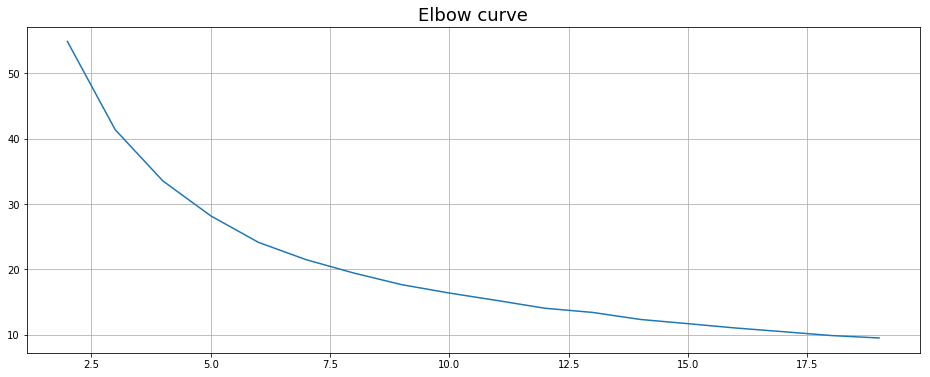

In [44]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = assets_data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = assets_data.pct_change().std() * sqrt(252)
returns['Betas'] = Betas_series
 
#format the data as a numpy array to feed into the K-Means algorithm
returns.dropna(inplace = True)
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility']), np.asarray(returns['Betas'])]).T
 
X = data
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(16, 6))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve', fontsize = 18)

In [18]:
X

array([[ 5.49845955e-02,  3.52201588e-01,  5.48786172e-01],
       [ 1.12988170e-01,  1.27836007e-01,  3.37078802e-01],
       [ 1.21724278e-01,  1.34518199e-01,  3.20059677e-01],
       [ 5.06708028e-02,  2.55043418e-01,  5.57486673e-01],
       [ 8.23613281e-02,  3.54741247e-01,  9.23763722e-01],
       [ 1.42763028e-01,  2.72499936e-01,  9.47869566e-01],
       [ 2.96889077e-01,  2.44655586e-01,  4.79894438e-01],
       [-8.25022726e-03,  3.43765182e-01,  8.34787129e-01],
       [ 1.05738912e-01,  2.87059361e-01,  6.17944718e-01],
       [ 2.38409103e-01,  2.53107342e-01,  1.39558504e+00],
       [-9.35854315e-02,  1.72668625e-01,  4.78325639e-01],
       [ 2.80045759e-02,  2.82572690e-01,  9.14179329e-01],
       [ 7.18467856e-01,  3.90000658e-01,  3.44500787e-01],
       [ 4.26062839e-01,  2.63165141e-01,  4.76112181e-01],
       [ 8.52949735e-01,  3.56687534e-01,  3.55116219e-01],
       [ 2.15216969e-01,  2.02655121e-01,  2.89024348e-01],
       [ 4.19232710e-01,  3.00987560e-01

In [19]:
returns

,Returns,Volatility,Betas
symbol,,,
ACSEL,0.054985,0.352202,0.548786
ADANA,0.112988,0.127836,0.337079
ADBGR,0.121724,0.134518,0.320060
ADEL,0.050671,0.255043,0.557487
ADESE,0.082361,0.354741,0.923764
ADNAC,0.142763,0.272500,0.947870
AEFES,0.296889,0.244656,0.479894
AFYON,-0.008250,0.343765,0.834787
AGYO,0.105739,0.287059,0.617945


In [45]:
from mpl_toolkits.mplot3d import Axes3D

In [49]:
centroids,_ = kmeans(data,10)

In [46]:
# computing K-Means with K = 10 (10 clusters)
centroids,_ = kmeans(data,10)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing


#fig = pyplot.figure()
#ax = Axes3D(fig)

fig = plt.figure(figsize = (16,6))
fig.add_subplot(111, projection='3d')
ax.scatter(data[idx==0,0],data[idx==0,1],data[idx == 0,2],c = 'b',marker = 'o',
           data[idx==1,0],data[idx==1,1],data[idx == 1,2],c = 'y',marker = 'o',
           data[idx==2,0],data[idx==2,1],data[idx == 2,2],c = 'r',marker = 'o',
           data[idx==3,0],data[idx==3,1],data[idx == 3,2],c = 'g',marker = 'o',
           data[idx==4,0],data[idx==4,1],data[idx == 4,2],c = 'm',marker = 'o',
           data[idx==5,0],data[idx==5,1],data[idx == 5,2],c = 'c',marker = 'o',
           data[idx==6,0],data[idx==6,1],data[idx == 6,2],marker = 'o',
           data[idx==7,0],data[idx==7,1],data[idx == 7,2],marker = 'o',
           data[idx==8,0],data[idx==8,1],data[idx == 8,2],marker = 'o',
           data[idx==9,0],data[idx==9,1],data[idx == 9,2],marker = 'o',
           data[idx==10,0],data[idx==10,1],data[idx == 10,2],marker = 'o',
           data[idx==11,0],data[idx==11,1],data[idx == 11,2],marker = 'o',
           data[idx==12,0],data[idx==12,1],data[idx == 12,2],marker = 'o',
           data[idx==13,0],data[idx==13,1],data[idx == 13,2],marker = 'o',
           data[idx==14,0],data[idx==14,1],data[idx == 14,2],s = 100)
     

    
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2], 'sk',markersize=10)
#plt.annotate(data[idx==0,0], data[idx==0,1], size = 15)
for i, txt in enumerate(range(0,15)):
    plt.annotate(str(txt), (centroids[i,0],centroids[i,1], centroids[i,2]), size = 30)

show()

SyntaxError: positional argument follows keyword argument (<ipython-input-46-69265346dd28>, line 15)

In [50]:
centroids

array([[ 0.10233677,  0.27994241,  0.62745984],
       [ 0.23083427,  0.40004084,  0.91647473],
       [ 0.39606607,  0.36496423,  0.57660213],
       [-0.20575659,  0.32094696,  0.73364525],
       [ 0.09722696,  0.2511443 ,  0.27645819],
       [ 0.59975796,  0.39466731,  0.81812545],
       [ 0.60550091,  0.40777863,  1.4125039 ],
       [ 0.99584487,  0.59902988,  0.88479048],
       [ 0.74097112,  0.50296085,  0.31684586],
       [ 1.57483873,  0.64994256,  0.53376329]])

TypeError: text() got multiple values for argument 's'

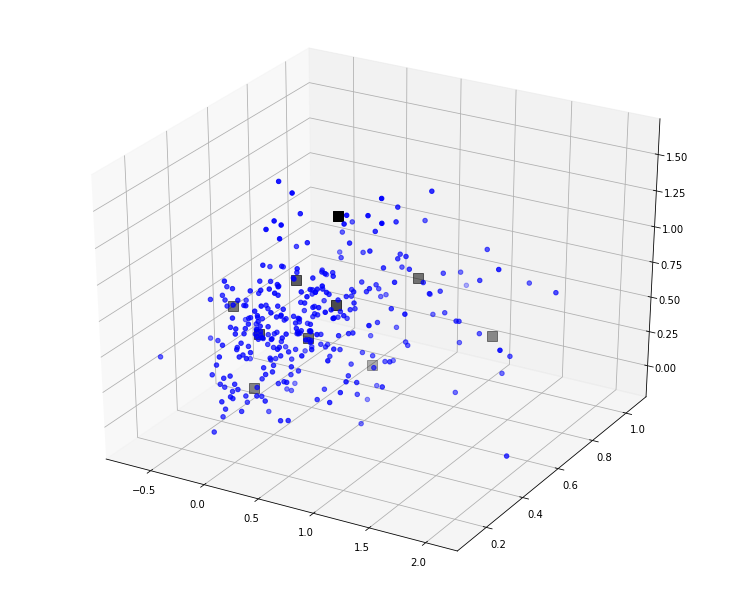

In [51]:
fig = plt.figure(figsize = (10,8))
ax = Axes3D(fig)
ax.scatter(data[:,0],data[:,1],data[:,2],c = 'b',marker = 'o')
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c = 'k',marker = 's', s = 100)
for i, txt in enumerate(range(0,15)):
    ax.text3D(centroids[i,0],centroids[i,1], centroids[i,2], str(txt), s = 100)


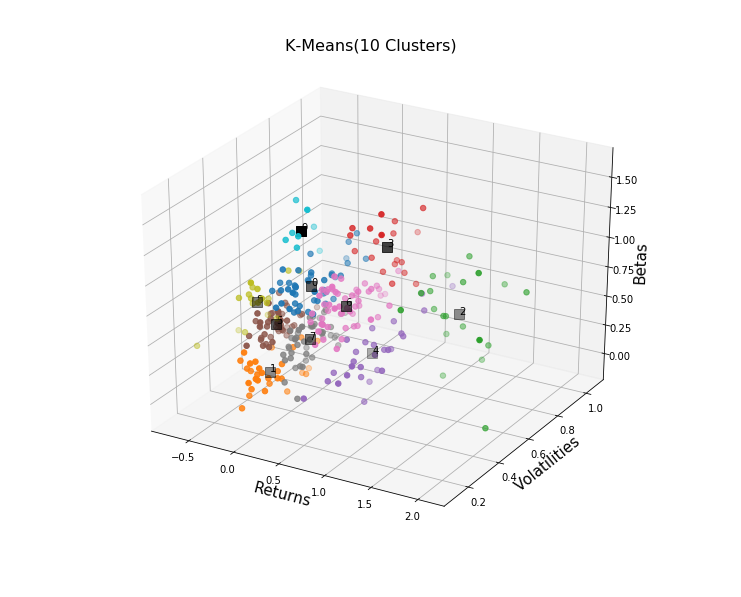

In [52]:
# computing K-Means with K = 10 (10 clusters)
centroids,_ = kmeans(data,10)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing


#fig = pyplot.figure()
#ax = Axes3D(fig)


fig = plt.figure(figsize = (10,8))
ax = Axes3D(fig)
for i in range(10):
    ax.scatter(data[idx==i,0],data[idx==i,1],data[idx == i,2],marker = 'o', s = 30)

    
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c = 'k',marker = 's', s = 100)


ax.set_xlabel('Returns', fontsize = 15)
ax.set_ylabel('Volatilities', fontsize = 15)
ax.set_zlabel('Betas', fontsize = 15)
ax.set_title('K-Means(10 Clusters)', fontsize = 16)
ax.dist = 12


for i, txt in enumerate(range(0,10)):
    ax.text3D(centroids[i,0],centroids[i,1], centroids[i,2], str(txt),)

In [ ]:
import plotly.plotly as py
import pandas as pd

scatter = dict(
    mode = "markers",
    name = "y",
    type = "scatter3d",    
    x = returns['Returns'], y = returns['Volatility'], z = returns['Betas'],
    marker = dict( size=2, color="rgb(23, 190, 207)" )
)
clusters = dict(
    alphahull = 7,
    name = "y",
    opacity = 0.1,
    type = "mesh3d",    
    x = returns['Returns'], y = returns['Volatility'], z = returns['Betas']
)
layout = dict(
    title = '3d point clustering',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),
    )
)
fig = dict( data=[scatter, clusters], layout=layout )
# Use py.iplot() for IPython notebook
py.iplot(fig, filename='3d point clustering')

In [22]:
plotly.__version__

NameError: name 'plotly' is not defined

## K-Means(Returns, Volatilities)

Text(0.5,1,'Elbow curve')

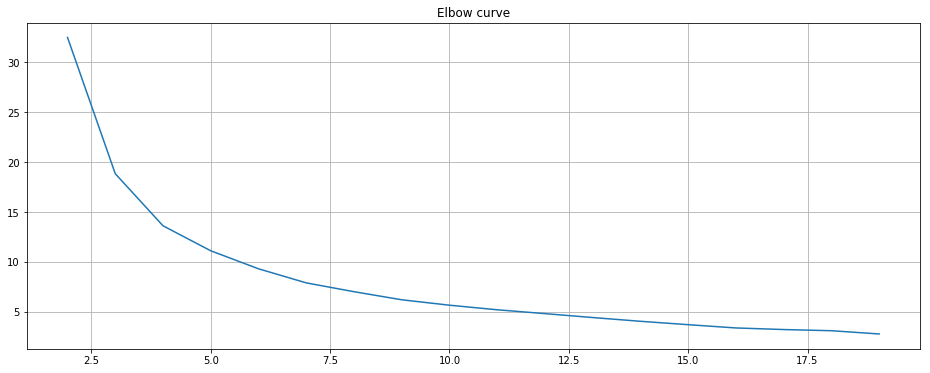

In [23]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns_1 = assets_data.pct_change().mean() * 252
returns_1 = pd.DataFrame(returns_1)
returns_1.columns = ['Returns']
returns_1['Volatility'] = assets_data.pct_change().std() * sqrt(252)
 
#format the data as a numpy array to feed into the K-Means algorithm
returns_1.dropna(inplace = True)
data_1 = np.asarray([np.asarray(returns_1['Returns']),np.asarray(returns_1['Volatility'])]).T
 
X1 = data_1
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X1)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(16, 6))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

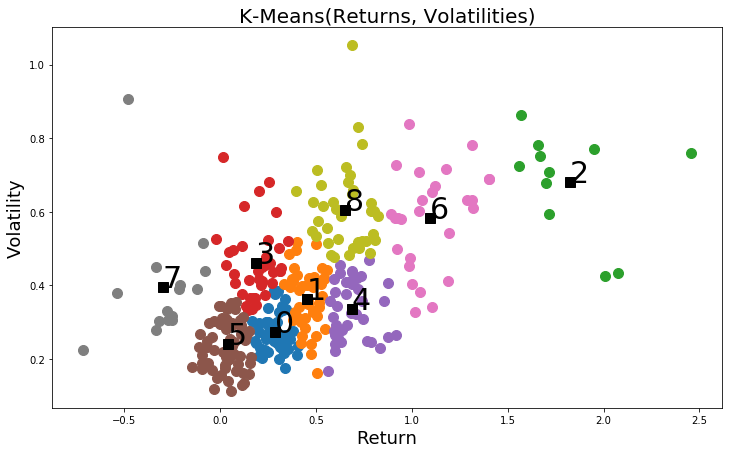

In [40]:
# computing K-Means with K = 9 (9 clusters)
centroids_1,_ = kmeans(data_1,9)
# assign each sample to a cluster
idx_1,_ = vq(data_1,centroids_1)
 
# some plotting using numpy's logical indexing



plt.figure(figsize = (12,7))

for i in range(9):
    plot(data_1[idx_1==i,0],data_1[idx_1==i,1], 'o',markersize = 10)
     

    
plot(centroids_1[:,0],centroids_1[:,1],'sk',markersize=10)
#plt.annotate(data[idx==0,0], data[idx==0,1], size = 15)
for i, txt in enumerate(range(9)):
    plt.annotate(str(txt), (centroids_1[i,0],centroids_1[i,1]), size = 30)

    
plt.title('K-Means(Returns, Volatilities)', fontsize = 20)
plt.xlabel('Return', fontsize = 18)
plt.ylabel('Volatility', fontsize = 18)

show()

In [25]:
details_1 = [(name,cluster) for name, cluster in zip(returns.index,idx_1)]
 
for detail in details_1:
    print(detail)

('ACSEL', 3)
('ADANA', 6)
('ADBGR', 6)
('ADEL', 6)
('ADESE', 3)
('ADNAC', 3)
('AEFES', 4)
('AFYON', 6)
('AGYO', 3)
('AKBNK', 3)
('AKCNS', 6)
('AKENR', 6)
('AKFGY', 1)
('AKGRT', 4)
('AKGUV', 1)
('AKMGY', 3)
('AKSA', 4)
('AKSEN', 4)
('AKSGY', 4)
('AKSUE', 3)
('ALARK', 1)
('ALBRK', 6)
('ALCAR', 1)
('ALCTL', 2)
('ALGYO', 4)
('ALKA', 0)
('ALKIM', 4)
('ALYAG', 5)
('ANACM', 4)
('ANELE', 0)
('ANHYT', 4)
('ANSGR', 4)
('ARCLK', 6)
('ARENA', 6)
('ARMDA', 6)
('ARSAN', 4)
('ASELS', 0)
('ASLAN', 6)
('ASUZU', 0)
('ATAGY', 6)
('ATEKS', 3)
('ATLAS', 2)
('ATPET', 2)
('AVGYO', 5)
('AVHOL', 2)
('AVISA', 6)
('AVOD', 2)
('AVTUR', 2)
('AYEN', 3)
('AYGAZ', 4)
('BAGFS', 6)
('BAKAB', 1)
('BERA', 7)
('BFREN', 7)
('BIMAS', 7)
('BIZIM', 4)
('BJKAS', 4)
('BLCYT', 6)
('BNTAS', 6)
('BOLUC', 2)
('BOSSA', 8)
('BOYP', 5)
('BRISA', 6)
('BRKSN', 1)
('BRMEN', 8)
('BRSAN', 3)
('BRYAT', 8)
('BSOKE', 5)
('BTCIM', 4)
('BUCIM', 4)
('BURCE', 4)
('CCOLA', 4)
('CELHA', 6)
('CEMAS', 3)
('CEMTS', 6)
('CIMSA', 1)
('CLEBI', 5)
('CMBTN

In [26]:
details_1

[('ACSEL', 3),
 ('ADANA', 6),
 ('ADBGR', 6),
 ('ADEL', 6),
 ('ADESE', 3),
 ('ADNAC', 3),
 ('AEFES', 4),
 ('AFYON', 6),
 ('AGYO', 3),
 ('AKBNK', 3),
 ('AKCNS', 6),
 ('AKENR', 6),
 ('AKFGY', 1),
 ('AKGRT', 4),
 ('AKGUV', 1),
 ('AKMGY', 3),
 ('AKSA', 4),
 ('AKSEN', 4),
 ('AKSGY', 4),
 ('AKSUE', 3),
 ('ALARK', 1),
 ('ALBRK', 6),
 ('ALCAR', 1),
 ('ALCTL', 2),
 ('ALGYO', 4),
 ('ALKA', 0),
 ('ALKIM', 4),
 ('ALYAG', 5),
 ('ANACM', 4),
 ('ANELE', 0),
 ('ANHYT', 4),
 ('ANSGR', 4),
 ('ARCLK', 6),
 ('ARENA', 6),
 ('ARMDA', 6),
 ('ARSAN', 4),
 ('ASELS', 0),
 ('ASLAN', 6),
 ('ASUZU', 0),
 ('ATAGY', 6),
 ('ATEKS', 3),
 ('ATLAS', 2),
 ('ATPET', 2),
 ('AVGYO', 5),
 ('AVHOL', 2),
 ('AVISA', 6),
 ('AVOD', 2),
 ('AVTUR', 2),
 ('AYEN', 3),
 ('AYGAZ', 4),
 ('BAGFS', 6),
 ('BAKAB', 1),
 ('BERA', 7),
 ('BFREN', 7),
 ('BIMAS', 7),
 ('BIZIM', 4),
 ('BJKAS', 4),
 ('BLCYT', 6),
 ('BNTAS', 6),
 ('BOLUC', 2),
 ('BOSSA', 8),
 ('BOYP', 5),
 ('BRISA', 6),
 ('BRKSN', 1),
 ('BRMEN', 8),
 ('BRSAN', 3),
 ('BRYAT', 8),
 ('

In [27]:
centroids_1

array([[ 1.08406047,  0.57899273],
       [ 0.68412137,  0.38185074],
       [ 0.22627517,  0.48677332],
       [ 0.16902082,  0.29355443],
       [ 0.40674252,  0.3076321 ],
       [ 0.61939278,  0.64312307],
       [ 0.01070553,  0.22523082],
       [ 1.78941615,  0.68089961],
       [-0.30054463,  0.39596673]])

## K-Means(Volatilities, Betas)

Text(0.5,1,'Elbow curve')

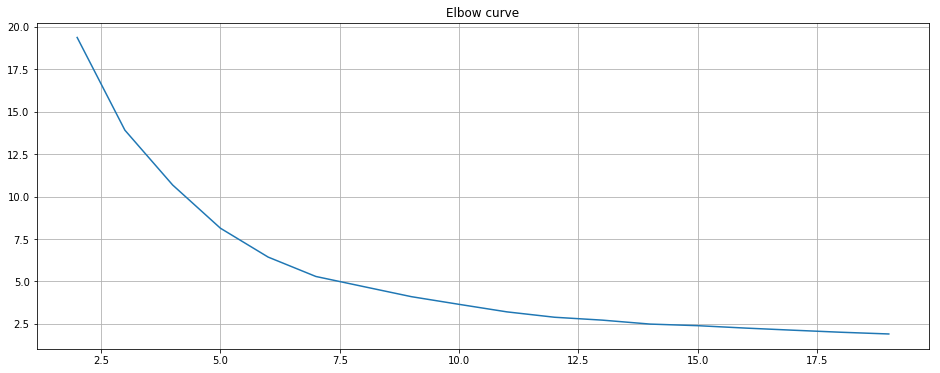

In [28]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns_2 = assets_data.pct_change().mean() * 252
returns_2 = pd.DataFrame(returns_2)
returns_2.columns = ['Returns']
returns_2['Volatility'] = assets_data.pct_change().std() * sqrt(252)
returns_2['Betas'] = Betas_series
 
#format the data as a numpy array to feed into the K-Means algorithm
returns_2.dropna(inplace = True)
data_2 = np.asarray([np.asarray(returns_2['Volatility']),np.asarray(returns_2['Betas'])]).T
 
X2 = data_2
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X2)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(16, 6))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

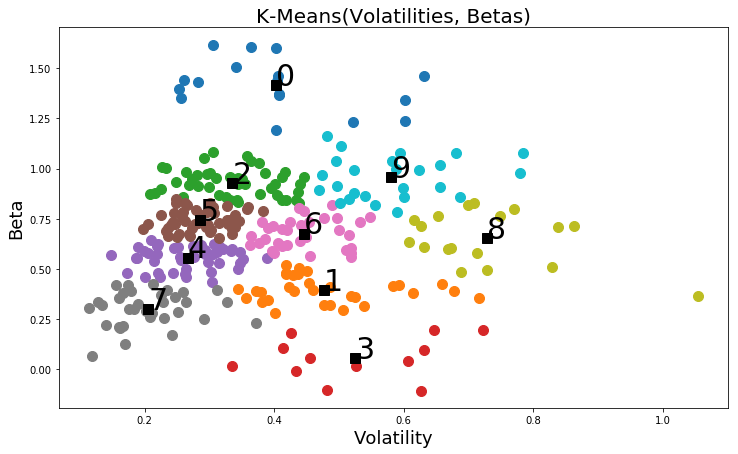

In [39]:
# computing K-Means with K = 10 (10 clusters)
centroids_2,_ = kmeans(data_2,10)
# assign each sample to a cluster
idx_2,_ = vq(data_2,centroids_2)
 
# some plotting using numpy's logical indexing



plt.figure(figsize = (12,7))

for i in range(10):
    plot(data_2[idx_2==i,0],data_2[idx_2==i,1], 'o',markersize = 10)
     

    
plot(centroids_2[:,0],centroids_2[:,1],'sk',markersize=10)
#plt.annotate(data[idx==0,0], data[idx==0,1], size = 15)
for i, txt in enumerate(range(10)):
    plt.annotate(str(txt), (centroids_2[i,0],centroids_2[i,1]), size = 30)

plt.title('K-Means(Volatilities, Betas)', fontsize = 20)
plt.xlabel('Volatility', fontsize = 18)
plt.ylabel('Beta', fontsize = 18)

show()

In [30]:
details_2 = [(name,cluster) for name, cluster in zip(returns.index,idx_2)]
 
for detail in details_2:
    print(detail)

('ACSEL', 5)
('ADANA', 7)
('ADBGR', 7)
('ADEL', 5)
('ADESE', 9)
('ADNAC', 9)
('AEFES', 5)
('AFYON', 9)
('AGYO', 5)
('AKBNK', 0)
('AKCNS', 5)
('AKENR', 9)
('AKFGY', 1)
('AKGRT', 5)
('AKGUV', 1)
('AKMGY', 7)
('AKSA', 8)
('AKSEN', 5)
('AKSGY', 7)
('AKSUE', 1)
('ALARK', 9)
('ALBRK', 8)
('ALCAR', 9)
('ALCTL', 2)
('ALGYO', 8)
('ALKA', 6)
('ALKIM', 8)
('ALYAG', 4)
('ANACM', 8)
('ANELE', 1)
('ANHYT', 7)
('ANSGR', 7)
('ARCLK', 8)
('ARENA', 8)
('ARMDA', 5)
('ARSAN', 8)
('ASELS', 9)
('ASLAN', 8)
('ASUZU', 2)
('ATAGY', 7)
('ATEKS', 5)
('ATLAS', 2)
('ATPET', 6)
('AVGYO', 3)
('AVHOL', 4)
('AVISA', 7)
('AVOD', 9)
('AVTUR', 2)
('AYEN', 7)
('AYGAZ', 8)
('BAGFS', 8)
('BAKAB', 8)
('BERA', 3)
('BFREN', 1)
('BIMAS', 7)
('BIZIM', 8)
('BJKAS', 5)
('BLCYT', 6)
('BNTAS', 3)
('BOLUC', 7)
('BOSSA', 7)
('BOYP', 7)
('BRISA', 5)
('BRKSN', 2)
('BRMEN', 4)
('BRSAN', 5)
('BRYAT', 5)
('BSOKE', 8)
('BTCIM', 8)
('BUCIM', 5)
('BURCE', 6)
('CCOLA', 8)
('CELHA', 6)
('CEMAS', 6)
('CEMTS', 9)
('CIMSA', 7)
('CLEBI', 9)
('CMBTN

In [31]:
details_2

[('ACSEL', 5),
 ('ADANA', 7),
 ('ADBGR', 7),
 ('ADEL', 5),
 ('ADESE', 9),
 ('ADNAC', 9),
 ('AEFES', 5),
 ('AFYON', 9),
 ('AGYO', 5),
 ('AKBNK', 0),
 ('AKCNS', 5),
 ('AKENR', 9),
 ('AKFGY', 1),
 ('AKGRT', 5),
 ('AKGUV', 1),
 ('AKMGY', 7),
 ('AKSA', 8),
 ('AKSEN', 5),
 ('AKSGY', 7),
 ('AKSUE', 1),
 ('ALARK', 9),
 ('ALBRK', 8),
 ('ALCAR', 9),
 ('ALCTL', 2),
 ('ALGYO', 8),
 ('ALKA', 6),
 ('ALKIM', 8),
 ('ALYAG', 4),
 ('ANACM', 8),
 ('ANELE', 1),
 ('ANHYT', 7),
 ('ANSGR', 7),
 ('ARCLK', 8),
 ('ARENA', 8),
 ('ARMDA', 5),
 ('ARSAN', 8),
 ('ASELS', 9),
 ('ASLAN', 8),
 ('ASUZU', 2),
 ('ATAGY', 7),
 ('ATEKS', 5),
 ('ATLAS', 2),
 ('ATPET', 6),
 ('AVGYO', 3),
 ('AVHOL', 4),
 ('AVISA', 7),
 ('AVOD', 9),
 ('AVTUR', 2),
 ('AYEN', 7),
 ('AYGAZ', 8),
 ('BAGFS', 8),
 ('BAKAB', 8),
 ('BERA', 3),
 ('BFREN', 1),
 ('BIMAS', 7),
 ('BIZIM', 8),
 ('BJKAS', 5),
 ('BLCYT', 6),
 ('BNTAS', 3),
 ('BOLUC', 7),
 ('BOSSA', 7),
 ('BOYP', 7),
 ('BRISA', 5),
 ('BRKSN', 2),
 ('BRMEN', 4),
 ('BRSAN', 5),
 ('BRYAT', 5),
 ('

In [32]:
centroids_2

array([[0.40754381, 1.40013355],
       [0.4322935 , 0.389803  ],
       [0.60275419, 0.91303729],
       [0.7300367 , 0.51004597],
       [0.52554564, 0.05824595],
       [0.26707094, 0.5572769 ],
       [0.45435545, 0.67235697],
       [0.19334056, 0.30072642],
       [0.28490377, 0.74305139],
       [0.33555447, 0.92954888]])

## K-Means(Returns, Betas)

Text(0.5,1,'Elbow curve')

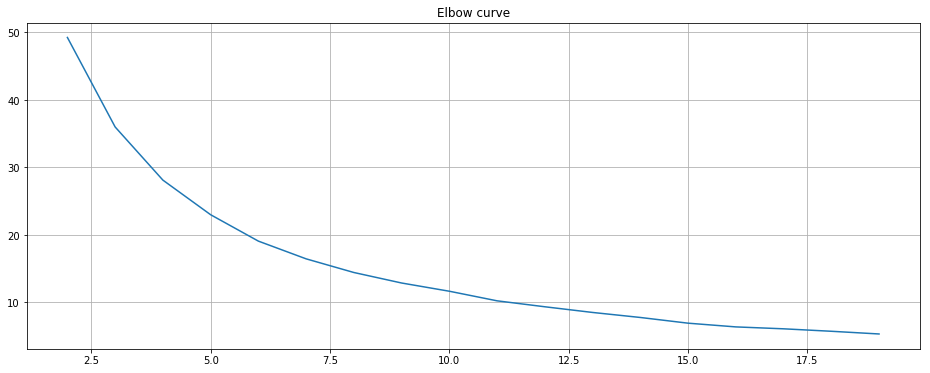

In [33]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns_3 = assets_data.pct_change().mean() * 252
returns_3 = pd.DataFrame(returns_3)
returns_3.columns = ['Returns']
returns_3['Volatility'] = assets_data.pct_change().std() * sqrt(252)
returns_3['Betas'] = Betas_series
 
#format the data as a numpy array to feed into the K-Means algorithm
returns_3.dropna(inplace = True)
data_3 = np.asarray([np.asarray(returns_3['Returns']),np.asarray(returns_3['Betas'])]).T
 
X3 = data_3
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X3)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(16, 6))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

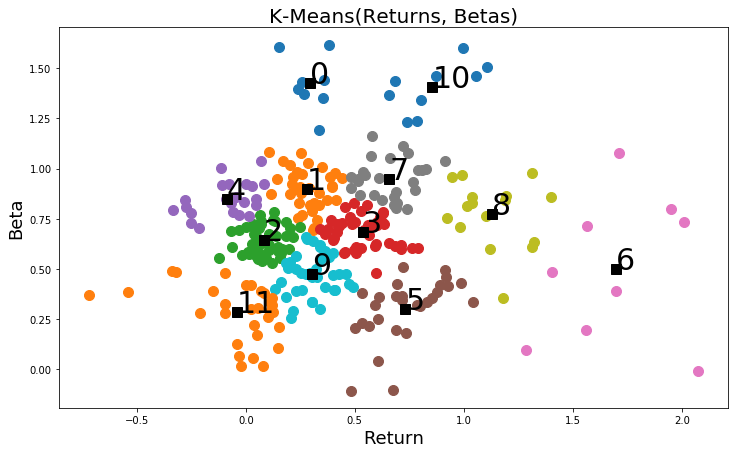

In [38]:
# computing K-Means with K = 12 (12 clusters)
centroids_3,_ = kmeans(data_3,12)
# assign each sample to a cluster
idx_3,_ = vq(data_3,centroids_3)
 
# some plotting using numpy's logical indexing



plt.figure(figsize = (12,7))

for i in range(12):
    plot(data_3[idx_3==i,0],data_3[idx_3==i,1], 'o',markersize = 10)
    
     

    
plot(centroids_3[:,0],centroids_3[:,1],'sk',markersize=10)
#plt.annotate(data[idx==0,0], data[idx==0,1], size = 15)
for i, txt in enumerate(range(12)):
    plt.annotate(str(txt), (centroids_3[i,0],centroids_3[i,1]), size = 30)
    
plt.title('K-Means(Returns, Betas)', fontsize = 20)
plt.xlabel('Return', fontsize = 18)
plt.ylabel('Beta', fontsize = 18)

show()

In [35]:
details_3 = [(name,cluster) for name, cluster in zip(returns.index,idx_3)]
 
for detail in details_3:
    print(detail)

('ACSEL', 9)
('ADANA', 5)
('ADBGR', 5)
('ADEL', 9)
('ADESE', 0)
('ADNAC', 0)
('AEFES', 6)
('AFYON', 0)
('AGYO', 9)
('AKBNK', 8)
('AKCNS', 9)
('AKENR', 0)
('AKFGY', 7)
('AKGRT', 6)
('AKGUV', 7)
('AKMGY', 5)
('AKSA', 6)
('AKSEN', 6)
('AKSGY', 6)
('AKSUE', 6)
('ALARK', 3)
('ALBRK', 9)
('ALCAR', 4)
('ALCTL', 4)
('ALGYO', 4)
('ALKA', 1)
('ALKIM', 3)
('ALYAG', 7)
('ANACM', 3)
('ANELE', 7)
('ANHYT', 7)
('ANSGR', 7)
('ARCLK', 0)
('ARENA', 0)
('ARMDA', 9)
('ARSAN', 4)
('ASELS', 1)
('ASLAN', 0)
('ASUZU', 1)
('ATAGY', 5)
('ATEKS', 9)
('ATLAS', 9)
('ATPET', 9)
('AVGYO', 7)
('AVHOL', 5)
('AVISA', 5)
('AVOD', 4)
('AVTUR', 0)
('AYEN', 5)
('AYGAZ', 3)
('BAGFS', 9)
('BAKAB', 3)
('BERA', 11)
('BFREN', 6)
('BIMAS', 6)
('BIZIM', 9)
('BJKAS', 9)
('BLCYT', 6)
('BNTAS', 7)
('BOLUC', 5)
('BOSSA', 7)
('BOYP', 10)
('BRISA', 9)
('BRKSN', 0)
('BRMEN', 7)
('BRSAN', 6)
('BRYAT', 3)
('BSOKE', 3)
('BTCIM', 6)
('BUCIM', 9)
('BURCE', 9)
('CCOLA', 9)
('CELHA', 3)
('CEMAS', 3)
('CEMTS', 4)
('CIMSA', 5)
('CLEBI', 3)
('CMB

In [36]:
details_3

[('ACSEL', 9),
 ('ADANA', 5),
 ('ADBGR', 5),
 ('ADEL', 9),
 ('ADESE', 0),
 ('ADNAC', 0),
 ('AEFES', 6),
 ('AFYON', 0),
 ('AGYO', 9),
 ('AKBNK', 8),
 ('AKCNS', 9),
 ('AKENR', 0),
 ('AKFGY', 7),
 ('AKGRT', 6),
 ('AKGUV', 7),
 ('AKMGY', 5),
 ('AKSA', 6),
 ('AKSEN', 6),
 ('AKSGY', 6),
 ('AKSUE', 6),
 ('ALARK', 3),
 ('ALBRK', 9),
 ('ALCAR', 4),
 ('ALCTL', 4),
 ('ALGYO', 4),
 ('ALKA', 1),
 ('ALKIM', 3),
 ('ALYAG', 7),
 ('ANACM', 3),
 ('ANELE', 7),
 ('ANHYT', 7),
 ('ANSGR', 7),
 ('ARCLK', 0),
 ('ARENA', 0),
 ('ARMDA', 9),
 ('ARSAN', 4),
 ('ASELS', 1),
 ('ASLAN', 0),
 ('ASUZU', 1),
 ('ATAGY', 5),
 ('ATEKS', 9),
 ('ATLAS', 9),
 ('ATPET', 9),
 ('AVGYO', 7),
 ('AVHOL', 5),
 ('AVISA', 5),
 ('AVOD', 4),
 ('AVTUR', 0),
 ('AYEN', 5),
 ('AYGAZ', 3),
 ('BAGFS', 9),
 ('BAKAB', 3),
 ('BERA', 11),
 ('BFREN', 6),
 ('BIMAS', 6),
 ('BIZIM', 9),
 ('BJKAS', 9),
 ('BLCYT', 6),
 ('BNTAS', 7),
 ('BOLUC', 5),
 ('BOSSA', 7),
 ('BOYP', 10),
 ('BRISA', 9),
 ('BRKSN', 0),
 ('BRMEN', 7),
 ('BRSAN', 6),
 ('BRYAT', 3),
 

In [37]:
centroids_3

array([[ 0.00940436,  0.84650136],
       [ 0.9454808 ,  0.90609718],
       [ 0.85592653,  1.40454581],
       [ 0.59589572,  0.73925491],
       [ 0.34585854,  0.92952085],
       [ 0.05375959,  0.2644438 ],
       [ 0.35655248,  0.53322659],
       [ 0.72704342,  0.30879863],
       [ 0.28755596,  1.45874992],
       [ 0.10610707,  0.61456337],
       [-0.33160824,  0.63168379],
       [ 1.57483873,  0.53376329]])